In [11]:
import mongomanagers
import os
import pymongo
import datetime
from datetime import timedelta
import random
import matplotlib.pyplot as plt
import pandas as pd


CLIENT = pymongo.MongoClient(os.environ.get('MONGODB_LOCAL'))
# CLIENT = pymongo.MongoClient(os.environ.get('MONGODB_AWS'))
DATABASE = os.environ.get('DATABASE')
db = mongomanagers.HabitsDBManager(client=CLIENT, database=DATABASE, collection='habits')
dbj = mongomanagers.JournalDBManager(client=CLIENT, database=DATABASE, collection='journal')
cddb = mongomanagers.CountdownsDBManager(client=CLIENT, database=DATABASE, collection='countdowns')
c = dbj.coll

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Functions and Graphs

In [11]:
today_string = (datetime.today() - timedelta(days=1)).strftime("%Y-%m-%d")
datetime.strptime(today_string, "%Y-%m-%d").strftime('%A %B %d, %Y')


'Saturday November 13, 2021'

In [196]:
today = datetime.today()
sorted([(today - timedelta(days=x)).strftime("%Y-%m-%d") for x in range(10)])


['2021-11-03',
 '2021-11-04',
 '2021-11-05',
 '2021-11-06',
 '2021-11-07',
 '2021-11-08',
 '2021-11-09',
 '2021-11-10',
 '2021-11-11',
 '2021-11-12']

In [197]:
def fake_maker(num_days):
    today = datetime.today()
    dates = sorted(
        [(today - timedelta(days=x)).strftime("%Y-%m-%d") for x in range(num_days)]
    )
    current_habits = c.find_one({'id': 'habits'})['current_habits']
    random_habits = [
        {k: random.choice([0, 1]) for k in current_habits} for x in range(num_days)
    ]
    return [(date, habits) for date, habits in zip(dates, random_habits)]


In [198]:
data = fake_maker(1000)


In [199]:
# don't actually need to put/get from db
# for date, habits in data:
# db.record_habits(date, habits)


In [200]:
dates = [d[0] for d in data]
habits = [d[1] for d in data]


In [201]:
from collections import Counter

counter = Counter()
for h in habits:
    counter.update(h)


In [203]:
counter


Counter({'Green Tea': 495,
         'Portion Control': 483,
         'Eat Healthy': 477,
         'Protein Shake': 526,
         'Yoga': 489,
         'Exercise': 504,
         'Vipassana': 517,
         'Python Hackerrank': 477,
         'SQL Hackerrank': 503,
         'SQL Vertabelo': 487,
         'Linux': 501,
         'Interview Question': 504,
         'Project': 494,
         'CS Degree': 500})

<BarContainer object of 14 artists>

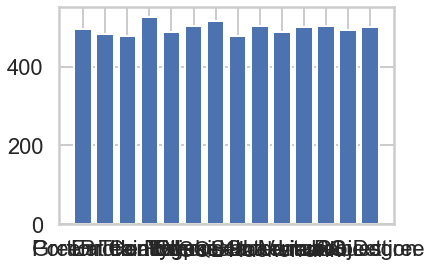

In [204]:
labels = counter.keys()
vals = counter.values()
plt.bar(labels, vals)


In [205]:
def habit_chooser(habit):
    return [h[habit] for h in habits[:10]]


green_tea = habit_chooser('Green Tea')


2021-11-12 12:19:42.074 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-11-12 12:19:42.076 Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


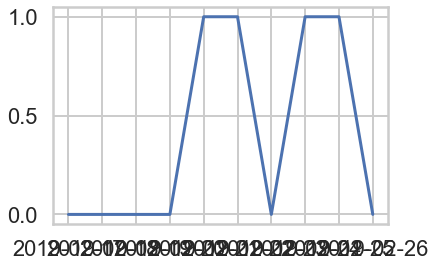

In [206]:
plt.plot(dates[:10], green_tea)


In [207]:
df = pd.DataFrame(habits)
df['date'] = dates
df['date'] = df['date'].astype('datetime64[ns]')
df.set_index('date', inplace=True)
df.columns.name = 'habit'
df


habit,Green Tea,Portion Control,Eat Healthy,Protein Shake,Yoga,Exercise,Vipassana,Python Hackerrank,SQL Hackerrank,SQL Vertabelo,Linux,Interview Question,Project,CS Degree
date,,,,,,,,,,,,,,
2019-02-17,0,0,0,0,0,1,0,0,1,0,1,0,0,0
2019-02-18,0,0,0,0,0,1,0,1,0,1,0,1,1,0
2019-02-19,0,0,0,0,0,1,1,0,0,1,1,0,0,1
2019-02-20,0,1,0,1,0,0,0,1,1,1,0,0,1,0
2019-02-21,1,0,1,1,0,0,1,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,0,0,0,0,0,0,0,0,1,1,1,0,0,0
2021-11-09,1,1,0,0,0,0,0,1,0,1,1,1,0,1
2021-11-10,0,1,0,0,0,0,0,1,1,0,1,0,0,0


In [208]:
import seaborn as sns


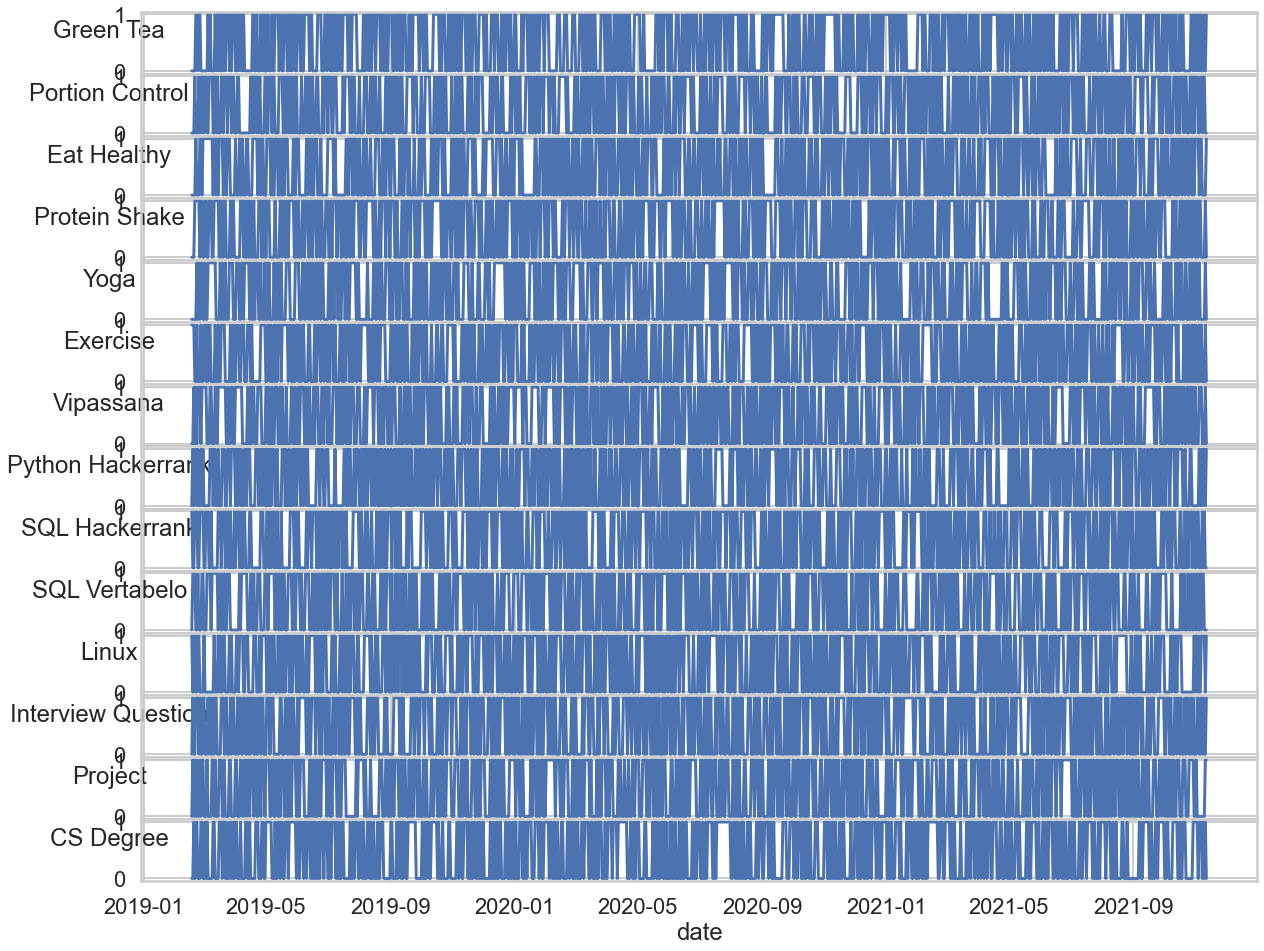

In [212]:
sns.set_context('poster')
fig, ax = plt.subplots(len(df.columns), 1, sharex=True, figsize=(20, 16))
fig.subplots_adjust(hspace=0)

for i, col in enumerate(df.columns):
    sns.lineplot(ax=ax[i], data=df, x=df.index, y=col)
    ax[i].set_ylabel(col, rotation='horizontal')
    # ax[i].yticks()


In [213]:
sums = [(col, sum(df[col])) for col in df.columns]
sorted(sums, key=lambda x: x[1], reverse=True)


[('Protein Shake', 526),
 ('Vipassana', 517),
 ('Exercise', 504),
 ('Interview Question', 504),
 ('SQL Hackerrank', 503),
 ('Linux', 501),
 ('CS Degree', 500),
 ('Green Tea', 495),
 ('Project', 494),
 ('Yoga', 489),
 ('SQL Vertabelo', 487),
 ('Portion Control', 483),
 ('Eat Healthy', 477),
 ('Python Hackerrank', 477)]

In [220]:
df.index.min()


Timestamp('2019-02-17 00:00:00')

<AxesSubplot:xlabel='date'>

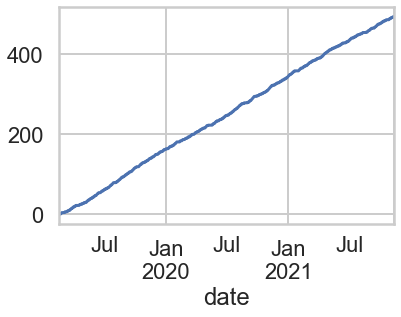

In [222]:
df['Green Tea'].cumsum().plot()
